In [22]:
import pandas as pd
import numpy as np

#visualisations
import matplotlib.pyplot as plt
import seaborn as sns

#Library for Modelling 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("processed_tweet_data.csv")

In [3]:
df.head()

,created_at,source,original_text,polarity,subjectivity,favorite_count,retweet_count,lang,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,location
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,NaN,355,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'nikitheblogger', 'name': 'Ne...",NaN
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,NaN,505,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'sagt_mit', 'name': 'Sie sagt...",NaN
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,NaN,4,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'Kryptonoun', 'name': 'Krypto...",NaN
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,0.0,NaN,332,NaN,McMc74078966,3,12,NaN,"[{'text': 'Deutschen', 'indices': [16, 26]}, {...","[{'screen_name': 'WRi007', 'name': 'Wolfgang B...",NaN
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,0.0,NaN,386,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'RolandTichy', 'name': 'Rolan...",NaN


In [4]:
Clean_Tweet = df[['original_text','polarity']]

In [5]:
def text_category (p):
    if p > 0:
        return 'positive'
    if p < 0:
        return 'negative'
    else:
        return 'neutral'

In [6]:
score = pd.Series([text_category(row_value) for row_value in Clean_Tweet['polarity']])
Clean_Tweet = pd.concat([Clean_Tweet, score.rename("score")], axis=1)
Clean_Tweet.head()

,original_text,polarity,score
0,RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,neutral
1,RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,neutral
2,RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,neutral
3,RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,neutral
4,RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,neutral


In [7]:
len(Clean_Tweet['polarity'])

24625

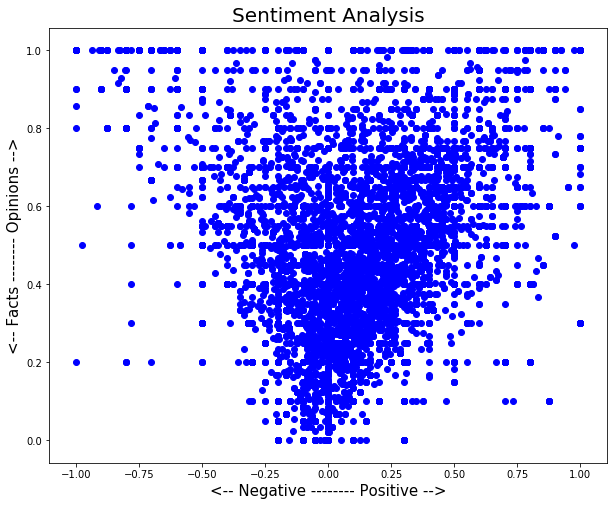

In [8]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

x = df.polarity
y = df.subjectivity
plt.scatter(x, y, color='blue')

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [9]:
neutral_count = len(Clean_Tweet[Clean_Tweet['score'] == "neutral"])
positive_count = len(Clean_Tweet[Clean_Tweet['score'] == "positive"])
negative_count = len(Clean_Tweet[Clean_Tweet['score'] == "negative"])

In [10]:
scoremap = pd.Series([1 if row_value == 'positive' else 0 for row_value in Clean_Tweet['score']])

In [11]:
Clean_Tweet = pd.concat([Clean_Tweet, scoremap.rename("scoremap")], axis=1)
Clean_Tweet['scoremap'] = scoremap
Clean_Tweet.reset_index()

,index,original_text,polarity,score,scoremap
0,0,RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,neutral,0
1,1,RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,neutral,0
2,2,RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,neutral,0
3,3,RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,neutral,0
4,4,RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,neutral,0
...,...,...,...,...,...
24620,24620,RT @waglenikhil: आपल्या घरातल्या कोणत्याही कार...,0.0,neutral,0
24621,24621,"RT @yadavtejashwi: चौहरमल नगर, फुलवारी शरीफ मे...",0.0,neutral,0
24622,24622,RT @Parthtiwari25: Gujarat Congress MLA arrest...,0.0,neutral,0
24623,24623,RT @news24tvchannel: CM नीतीश कुमार ने तेजस्वी...,0.0,neutral,0


In [12]:
X, y = Clean_Tweet['original_text'], Clean_Tweet['scoremap']


In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(X_trigram, y, train_size=0.75, stratify=y)

In [30]:
print(X_train.size)
print(X_test.size)
print(y_train.size)
print(y_test.size)

806959
6157
18468
6157


In [20]:
trigram_vectorizer = CountVectorizer(ngram_range=(1, 3))
trigram_vectorizer.fit(X.values)

CountVectorizer(ngram_range=(1, 3))

In [23]:
X_trigram = trigram_vectorizer.transform(X.values)
trigram_tf_idf_transformer = TfidfTransformer()
trigram_tf_idf_transformer.fit(X_trigram)

TfidfTransformer()

In [24]:
X_train_tf_idf = trigram_tf_idf_transformer.transform(X_trigram)

In [32]:
clf = SGDClassifier()
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
valid_score = clf.score(X_valid, y_valid)
print(f'Train score: {round(train_score, 2)} ; Validation score: {round(valid_score, 2)}\n')

Train score: 1.0 ; Validation score: 0.91



In [34]:
!pip install gensim

  Found existing installation: Cython 0.29.13
    Uninstalling Cython-0.29.13:
      Successfully uninstalled Cython-0.29.13


In [75]:
!pip install wordcloud

# Topic modeling

In [76]:
import string
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from wordcloud import STOPWORDS,WordCloud

In [80]:
def remove_stopwords(sent: str) -> str:
    sent_list = sent.split()
    return ' '.join([word for word in sent_list if word not in STOPWORDS])

In [95]:
class TopicModel:
    
    def __init__(self, tweet_df):
        self.df = tweet_df
    
    def extract_text_df(self):
        self.df = pd.DataFrame(self.df['original_text']) 
        
        return self.df
    
    def further_pre_process(self):
        
        self.df['original_text']= df['original_text'].apply(lambda x: str(x).translate(str.maketrans(' ', ' ', string.punctuation))) 
        
        return self.df
    
    def prepare_inputs(self):
        
        df = self.extract_text_df()
        df = self.further_pre_process()
        
        sentence_list = [text for text in self.df['original_text']]
        word_list = [sent.split() for sent in sentence_list]
       # word_list = [word for word in sent_list if word not in STOPWORDS]
        word_to_int = corpora.Dictionary(word_list)
        corpus = [word_to_int.doc2bow(tweet) for tweet in word_list]
        
        return word_list, word_to_int, corpus
    def build(self):
        word_list, word_to_int, corpus = self.prepare_inputs()
        lda_model = gensim.models.ldamodel.LdaModel(
            corpus, id2word=word_to_int,num_topics=5, 
            random_state=100, update_every=1, 
            chunksize=100, passes=10, alpha='auto',
            per_word_topics=True
        )

In [96]:
#df = read_proccessed_data(CLEANED_SAVE_PATH)
tm = TopicModel(df)

In [43]:
tm.extract_text_df()

,original_text
0,RT @nikitheblogger: Irre: Annalena Baerbock sa...
1,RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...
2,RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...
3,RT @WRi007: Die #Deutschen sind ein braves Vol...
4,RT @RolandTichy: Baerbock verkündet mal so neb...
...,...
24620,RT @waglenikhil: आपल्या घरातल्या कोणत्याही कार...
24621,"RT @yadavtejashwi: चौहरमल नगर, फुलवारी शरीफ मे..."
24622,RT @Parthtiwari25: Gujarat Congress MLA arrest...
24623,RT @news24tvchannel: CM नीतीश कुमार ने तेजस्वी...


In [49]:
tm.further_pre_process()

,created_at,source,original_text,polarity,subjectivity,favorite_count,retweet_count,lang,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,location
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT nikitheblogger Irre Annalena Baerbock sagt ...,0.0,0.0,NaN,355,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'nikitheblogger', 'name': 'Ne...",NaN
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT sagtmit Merkel schaffte es in 1 Jahr 1 Mill...,0.0,0.0,NaN,505,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'sagt_mit', 'name': 'Sie sagt...",NaN
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT Kryptonoun WRi007 Pharma in Lebensmitteln T...,0.0,0.0,NaN,4,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'Kryptonoun', 'name': 'Krypto...",NaN
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT WRi007 Die Deutschen sind ein braves Volk M...,0.0,0.0,NaN,332,NaN,McMc74078966,3,12,NaN,"[{'text': 'Deutschen', 'indices': [16, 26]}, {...","[{'screen_name': 'WRi007', 'name': 'Wolfgang B...",NaN
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT RolandTichy Baerbock verkündet mal so neben...,0.0,0.0,NaN,386,NaN,McMc74078966,3,12,NaN,[],"[{'screen_name': 'RolandTichy', 'name': 'Rolan...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24620,Fri Apr 22 14:44:56 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT waglenikhil आपल्या घरातल्या कोणत्याही कार्य...,0.0,0.0,NaN,242,NaN,kitukalesatya,706,643,NaN,[],"[{'screen_name': 'waglenikhil', 'name': 'nikhi...",NaN
24621,Fri Apr 22 14:44:44 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT yadavtejashwi चौहरमल नगर फुलवारी शरीफ में आ...,0.0,0.0,NaN,242,NaN,kitukalesatya,706,643,NaN,[],"[{'screen_name': 'yadavtejashwi', 'name': 'Tej...",NaN
24622,Fri Apr 22 14:44:35 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT Parthtiwari25 Gujarat Congress MLA arrested...,0.0,0.0,NaN,203,NaN,kitukalesatya,706,643,NaN,[],"[{'screen_name': 'Parthtiwari25', 'name': 'Par...",NaN
24623,Fri Apr 22 14:44:08 +0000 2022,"<a href=""http://twitter.com/download/iphone"" r...",RT news24tvchannel CM नीतीश कुमार ने तेजस्वी य...,0.0,0.0,NaN,301,NaN,kitukalesatya,706,643,NaN,[],"[{'screen_name': 'news24tvchannel', 'name': 'N...",NaN


In [100]:
tm.prepare_inputs()

([['RT',
   'nikitheblogger',
   'Irre',
   'Annalena',
   'Baerbock',
   'sagt',
   'es',
   'bricht',
   'ihr',
   'das',
   'Herz',
   'dass',
   'man',
   'nicht',
   'bedingungslos',
   'schwere',
   'Waffen',
   'liefert',
   'Mir',
   'bricht',
   'e…'],
  ['RT',
   'sagtmit',
   'Merkel',
   'schaffte',
   'es',
   'in',
   '1',
   'Jahr',
   '1',
   'Million',
   'Flüchtlinge',
   'durchzufüttern',
   'jedoch',
   'nicht',
   'nach',
   '16',
   'Jahren',
   '1',
   'Million',
   'Rentner',
   'aus',
   'der',
   'Ar…'],
  ['RT',
   'Kryptonoun',
   'WRi007',
   'Pharma',
   'in',
   'Lebensmitteln',
   'Trinkwasser',
   'in',
   'der',
   'Luft',
   'oder',
   'in',
   'der',
   'Zahnpasta',
   'irgendwo',
   'muss',
   'ein',
   'Beruhigungsmittel',
   'bzw',
   'Be…'],
  ['RT',
   'WRi007',
   'Die',
   'Deutschen',
   'sind',
   'ein',
   'braves',
   'Volk',
   'Mit',
   'Spritpreisen',
   'von',
   '2',
   'Euro',
   'abgefunden',
   'Mit',
   'inflation',
   'abgefunden

In [104]:
word_list, word_to_int, corpus = tm.prepare_inputs()
lda_model = gensim.models.ldamodel.LdaModel(
            corpus, id2word=word_to_int,num_topics=5, 
            random_state=100, update_every=1, 
            chunksize=100, passes=10, alpha='auto',
            per_word_topics=True
        )

In [105]:
lda_model.print_topics(-1)

[(0,
  '0.027*"RT" + 0.014*"NewszNow" + 0.010*"Follow" + 0.009*"100" + 0.007*"OUT" + 0.006*"ARMY" + 0.005*"2" + 0.005*"\U0001f7e9\U0001f7e9\U0001f7e9\U0001f7e9\U0001f7e9" + 0.005*"Congress" + 0.004*"Wordle"'),
 (1,
  '0.050*"RT" + 0.040*"the" + 0.030*"to" + 0.024*"of" + 0.020*"in" + 0.017*"a" + 0.016*"and" + 0.015*"is" + 0.014*"for" + 0.012*"on"'),
 (2,
  '0.039*"RT" + 0.026*"के" + 0.020*"में" + 0.019*"है" + 0.017*"की" + 0.014*"का" + 0.011*"पर" + 0.010*"को" + 0.009*"से" + 0.008*"और"'),
 (3,
  '0.026*"by" + 0.019*"I" + 0.015*"SriLanka" + 0.012*"lka" + 0.011*"A" + 0.011*"RT" + 0.010*"10" + 0.010*"about" + 0.008*"EconomicCrisisLK" + 0.007*"MirrorNow"'),
 (4,
  '0.019*"you" + 0.016*"with" + 0.015*"from" + 0.013*"be" + 0.010*"more" + 0.007*"they" + 0.007*"your" + 0.006*"follow" + 0.006*"what" + 0.005*"were"')]